### 0.3 Making dataset

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import src.visualization.visualize as vs
import src.features.build_features as bf
import os
import cv2
import pandas as pd
import numpy as np
from src.data.make_dataset import get_images
from src.data.make_dataset import create_dataset_added_features
from matplotlib import pyplot as plt

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
proc_data_dir = '../data/raw/'
train_image_dir = os.path.join(proc_data_dir, 'train')

In [6]:
images, labels_str = get_images(train_image_dir)

In [7]:
labels_int = []
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }
for label in labels_str:
    labels_int.append(mapping[label])

In [8]:
images = np.reshape(images,(-1,200,200,3))
labels = np.array(labels_int)

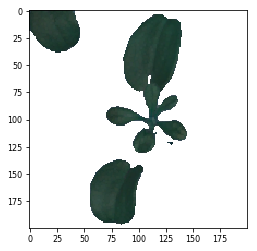

In [9]:
plt.imshow(images[0]) ##!!!!! damn 754
blur = cv2.GaussianBlur(images[0], (3, 3), 2)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
lower_green = np.array([22, 60, 0]) #second 75
upper_green = np.array([150, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
masked_img = cv2.bitwise_and(images[0], images[0], mask=opened_mask)

#masked_img = sharpen_image(masked_img)

masked_img[mask == 0] = 255

kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(masked_img,kernel,iterations = 1)

#den_image = cv2.fastNlMeansDenoisingColored(masked_img, None, 5, 5, 5, 5)
plt.imshow(dilation)

In [10]:
#dataset = create_dataset(images, labels)
dataset = create_dataset_added_features(images, labels, kind='label')

/Users/anacriel/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:132: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [11]:
dataset.head(30)

,label,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,9,8255.5,4631.0,3,515.102593,75,128,0.585938,1.162861,32.139868,11.055200,13.004900,7.143275,21.374102,25.050269,14.130791,608.716383,0.955533,2.763928
0,9,9755.0,5596.0,2,457.587873,111,111,1.000000,1.263045,21.464548,14.568075,17.011750,8.623075,25.321532,29.574539,15.310576,534.379805,0.962632,3.000271
0,9,7199.5,3142.0,3,216.994947,63,65,0.969231,0.568789,6.540289,10.934300,12.713125,6.926350,23.012513,26.634183,14.777568,488.828590,0.957606,2.395094
0,9,8916.5,4455.0,3,268.793937,68,92,0.739130,0.701621,8.102975,13.261675,15.467050,7.692150,24.513634,28.490521,14.504685,409.607936,0.969524,2.628570
0,9,11932.5,7307.0,2,341.504615,103,103,1.000000,0.889084,9.773761,16.791500,19.541600,10.771450,25.461550,29.531543,16.773968,477.301618,0.971588,3.598227
0,9,9690.0,5165.0,2,275.965510,76,86,0.883721,0.674510,7.859336,14.839550,17.609325,8.772150,26.002006,30.745163,15.614563,363.836563,0.973569,2.778282
0,9,12882.5,12882.5,1,574.256920,172,155,1.109677,2.069474,25.598371,18.920400,22.083800,8.354050,27.884396,32.202062,13.728103,376.410593,0.977817,3.820916
0,9,9795.0,6693.0,2,674.984843,107,150,0.713333,1.638591,46.513991,12.386850,14.577350,8.072575,21.590478,25.318638,14.524228,697.582812,0.955448,3.045495
0,9,11402.0,5453.0,3,317.906635,89,87,1.022989,0.679091,8.863763,16.761025,20.167275,9.808975,26.240992,31.574532,15.806765,530.442124,0.966073,3.336639
0,9,6543.0,6543.0,1,565.872143,107,180,0.594444,2.943604,48.939521,9.328825,10.487200,4.302375,21.095566,23.455026,10.204354,394.499773,0.965085,2.181142


In [12]:
dataset.to_csv("data/features_resolut_200_new_seg_1.csv")